In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
import itertools
from sklearn.metrics import silhouette_samples, silhouette_score
import seaborn as sns

import warnings


%load_ext autoreload
%autoreload 2

warnings.filterwarnings('ignore')


In [2]:
dataset_path = "..//datos//"
abnb_users_curated = "modified_train_users.csv"

In [3]:

users_df = pd.read_csv( dataset_path + abnb_users_curated)

In [4]:
# Print the number of records and the total number of movies
print('The dataset contains: ', len(users_df),' users.')

The dataset contains:  121070  users.


In [5]:
users_df.head()

,Unnamed: 0,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,...,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,total_seconds,average_seconds,total_sessions,number_of_devices,has_booked
0,1,820tgsjxq7,1306281600,1243100889,-9223372037,1,38.0,1,0,5,...,6,2,3,7,0,0.0,0.0,1,1,False
1,2,4ft3gnwmtx,1285632000,1244589167,1280707200,0,56.0,0,3,5,...,6,2,6,14,1,0.0,0.0,1,1,True
2,3,bjjt8pjhuk,1323043200,1256968889,1347062400,0,42.0,1,0,5,...,6,2,3,13,2,0.0,0.0,1,1,True
3,4,87mebub9p4,1284422400,1260252665,1266451200,2,41.0,0,0,5,...,6,2,3,7,1,0.0,0.0,1,1,True
4,6,lsw9q7uk0j,1262390400,1262395558,1262649600,0,46.0,0,0,5,...,6,2,3,30,1,0.0,0.0,1,1,True


In [6]:
users_df[ users_df['has_booked'] == True ]['total_sessions'].nunique()

765

In [39]:
users_df[ users_df['has_booked'] == True ]['first_device_type'].nunique()

9

In [37]:
# Hay usuarios con mil sesiones distintas, que nunca reservaron!!

users_df[ (users_df['total_sessions'] > 1000) & (users_df['has_booked'] == False ) ]

,Unnamed: 0,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,...,signup_app,first_device_type,first_browser,country_destination,total_seconds,average_seconds,total_sessions,number_of_devices,has_booked,region_destination
81556,140701,aqaf70t5o1,1389484800,1389486676,-9223372037,0,25.0,0,0,5,...,2,3,30,0,5614716.0,4933.845343,1138,1,False,5
84232,145725,ytplei6boz,1390608000,1390615059,-9223372037,1,33.0,0,23,5,...,0,4,0,0,5650788.0,4780.700508,1182,1,False,5
87697,152264,a30puilbmc,1392163200,1392243209,-9223372037,2,42.0,0,0,5,...,2,3,30,0,14544222.0,12304.756345,1182,3,False,5
92530,161296,9o8odsj9vl,1394323200,1394409441,-9223372037,0,28.0,1,12,5,...,0,4,0,0,15691183.0,11789.018032,1331,1,False,5
100261,175439,9qq49geknl,1397433600,1397449053,-9223372037,0,26.0,0,25,5,...,3,8,0,0,9495148.0,8531.130279,1113,2,False,5
101569,177826,vgjs764d6a,1397952000,1397955334,-9223372037,2,27.0,0,25,5,...,3,8,21,0,11796944.0,9362.653968,1260,2,False,5
102385,179286,r541x78s24,1398211200,1398229794,-9223372037,1,43.0,0,0,5,...,2,3,30,0,13234965.0,7385.583147,1792,1,False,5
104525,183187,llvyczd9hn,1398902400,1398972415,-9223372037,1,35.0,0,0,5,...,2,3,7,0,38222509.0,31176.597879,1226,5,False,5
106977,187684,ollruw7ti4,1399852800,1399860052,-9223372037,0,27.0,0,25,5,...,3,8,0,0,11795072.0,11632.220907,1014,1,False,5
107610,188861,e8h4qghxlg,1400025600,1400029035,-9223372037,1,46.0,0,24,5,...,1,6,7,0,6634508.0,3450.082163,1923,3,False,5


In [9]:
users_df[ users_df['has_booked'] == True ]['language'].nunique()

23

In [10]:
users_df[ users_df['has_booked'] == True ].groupby('language')['language'].count()

language
0         2
1         4
2        16
3       203
4         6
5     65117
6       220
7         6
8       309
10        3
12        2
13       87
14       61
15      151
16       26
17       12
18       11
19       54
20       88
21       35
22        2
23       19
24      402
Name: language, dtype: int64

In [11]:
country_dict = {
    'NDF': 0,
    'US': 1,
    'other': 2,
    'FR': 3,
    'CA': 4,
    'GB': 5,
    'ES': 6,
    'IT': 7,
    'PT': 8,
    'NL': 9,
    'DE': 10,
    'AU': 11
}

europe_set = {3,5,6,7,8,9,10}
north_america_set = {4}
oceania_set = {11}
usa_set = {1}
other_set = {2}

europe_region = 0
north_america_region = 1
oceania_region = 2
usa_region = 3
other_region = 4
no_region = 5

def assign_region( country ):
    if country in europe_set:
        return europe_region
    
    if country in north_america_set:
        return north_america_region
    
    if country in oceania_set:
        return oceania_region
    
    if country in usa_set:
        return usa_region

    if country in other_set:
        return other_region
    
    return no_region
    

In [68]:
users_df['region_destination'] = users_df['country_destination'].apply(lambda x: assign_region(x))

# parece que agregar lenguage o total_sessions hace que un grupo sea mucho mas grande... 
users_to_cluster_df = users_df[ ['has_booked','age','gender','first_device_type']]

print( "Number of records: ", len(users_to_cluster_df))
users_to_cluster_df.head()

Number of records:  121070


,has_booked,age,gender,first_device_type
0,False,38.0,1,3
1,True,56.0,0,6
2,True,42.0,0,3
3,True,41.0,2,3
4,True,46.0,0,3


In [70]:
# Let's turn our dataset into a list

users_to_cluster = users_to_cluster_df.values

In [13]:
# Defining the scatterplot drawing function
def draw_scatterplot(x_data, x_label, y_data, y_label):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)    
    
    #plt.xlim(0, 5)
   # plt.ylim(0, 5)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.scatter(x_data, y_data, s=30)
    

In [14]:
# Defining the cluster plotting function
def draw_clusters(biased_dataset, predictions, cmap='viridis'):
    
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    ax.set_xlabel('gender')
    ax.set_ylabel('region')
    
    clustered = pd.concat([biased_dataset.reset_index(), pd.DataFrame({'group':predictions})], axis=1)
    plt.scatter(clustered['gender'], clustered['age'], c=clustered['group'], s=20, cmap=cmap)
    


In [15]:
def add_cluster_to_dataset( original_df, predictions):
    return  pd.concat([original_df.reset_index(), pd.DataFrame({'group':predictions})], axis=1)

In [42]:
def cluster_show_by_age_region( clustered ):

#    fig = plt.figure(figsize=(8,8))
#    ax = fig.add_subplot(111)
#    ax.set_xlabel('age')
#    ax.set_ylabel('region')

#    plt.scatter(clustered['age'], clustered['region_destination'], label='group', c=clustered['group'], s=20)
#    plt.scatter(clustered['age'], clustered['region_destination'], 
#                label=, c=clustered['group'], s=20,
#               marker='o')
 
#    plt.legend(loc=2)
#    plt.show()   

    sns.set(style="white")
    sns.relplot(x="age", y="region_destination", hue="group",
            sizes=(40, 400), alpha=.5,
            height=6, data=clustered)

In [43]:
def cluster_show_by_age_gender( clustered ):

#    fig = plt.figure(figsize=(8,8))
#    ax = fig.add_subplot(111)
#    ax.set_xlabel('age')
#    ax.set_ylabel('region')

#    plt.scatter(clustered['age'], clustered['region_destination'], label='group', c=clustered['group'], s=20)
#    plt.scatter(clustered['age'], clustered['region_destination'], 
#                label=, c=clustered['group'], s=20,
#               marker='o')
 
#    plt.legend(loc=2)
#    plt.show()   
    colores=['red','green','blue','cyan','yellow']
    sns.set(style="white")
    sns.relplot(x="gender", y="age", hue="group",
            sizes=(40, 400), alpha=.5,
            height=6, data=clustered)

# Clustering

In [71]:
from sklearn.cluster import KMeans


In [72]:
def kmeans_generate_predictions( n_clusters ):

    kmeans = KMeans( n_clusters )

    predictions = kmeans.fit_predict(users_to_cluster)
    
    return predictions

## K = 2

In [73]:
predictions = kmeans_generate_predictions( 2 )

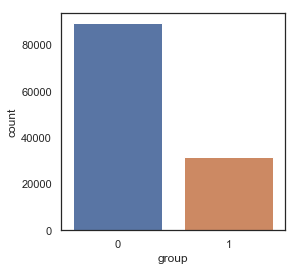

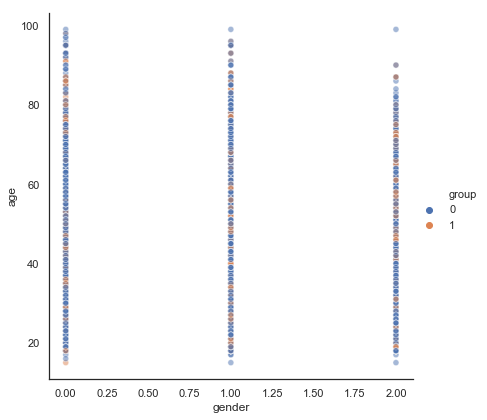

In [74]:
plt.figure(figsize=(4,4))
sns.countplot(data=pd.DataFrame({'group':predictions}), x='group')

clustered = add_cluster_to_dataset(users_who_booked, predictions)

cluster_show_by_age_gender( clustered ) 

## K = 3

In [75]:
predictions = []
clustered = []

predictions = kmeans_generate_predictions( 3 )

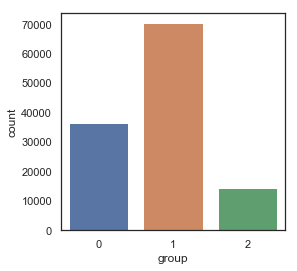

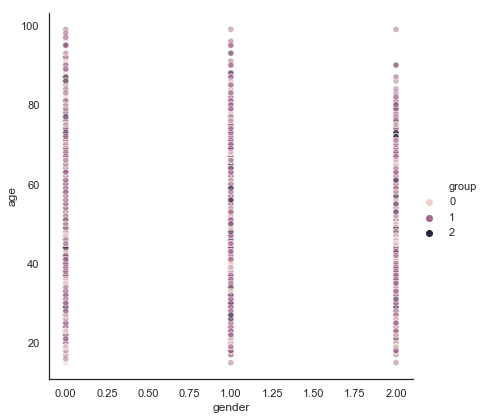

In [76]:
clustered = add_cluster_to_dataset(users_who_booked, predictions)

plt.figure(figsize=(4,4))
sns.countplot(data=pd.DataFrame({'group':predictions}), x='group')

cluster_show_by_age_gender( clustered ) 

## K = 4

In [77]:
predictions = []
clustered = []

predictions = kmeans_generate_predictions( 4 )

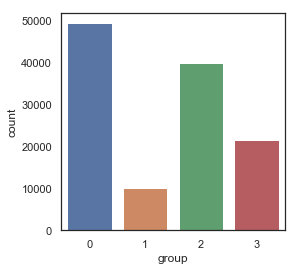

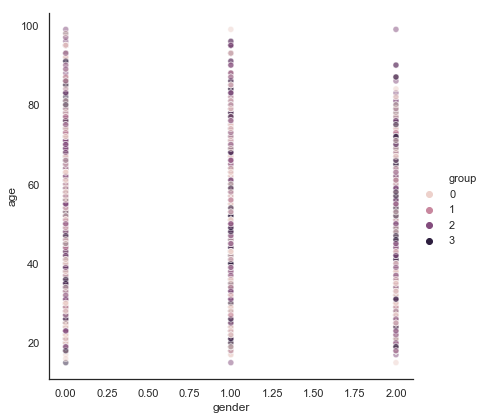

In [78]:
clustered = add_cluster_to_dataset(users_who_booked, predictions)

plt.figure(figsize=(4,4))
sns.countplot(data=pd.DataFrame({'group':predictions}), x='group')

cluster_show_by_age_gender( clustered ) 

## K = 5

In [79]:
predictions = []
clustered = []

predictions = kmeans_generate_predictions( 5 )

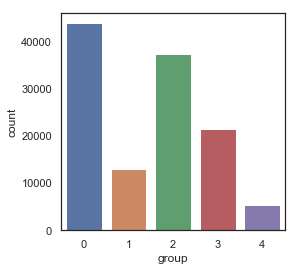

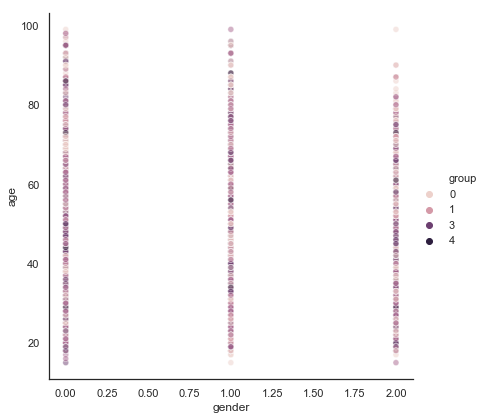

In [80]:
clustered = add_cluster_to_dataset(users_who_booked, predictions)

plt.figure(figsize=(4,4))
sns.countplot(data=pd.DataFrame({'group':predictions}), x='group')

cluster_show_by_age_gender( clustered ) 

In [81]:
# este grafico no termina...
#sns.catplot(x="age", y="region_destination", hue="group", kind="swarm",
#            data=clustered, 
#            height=4, aspect=.7)

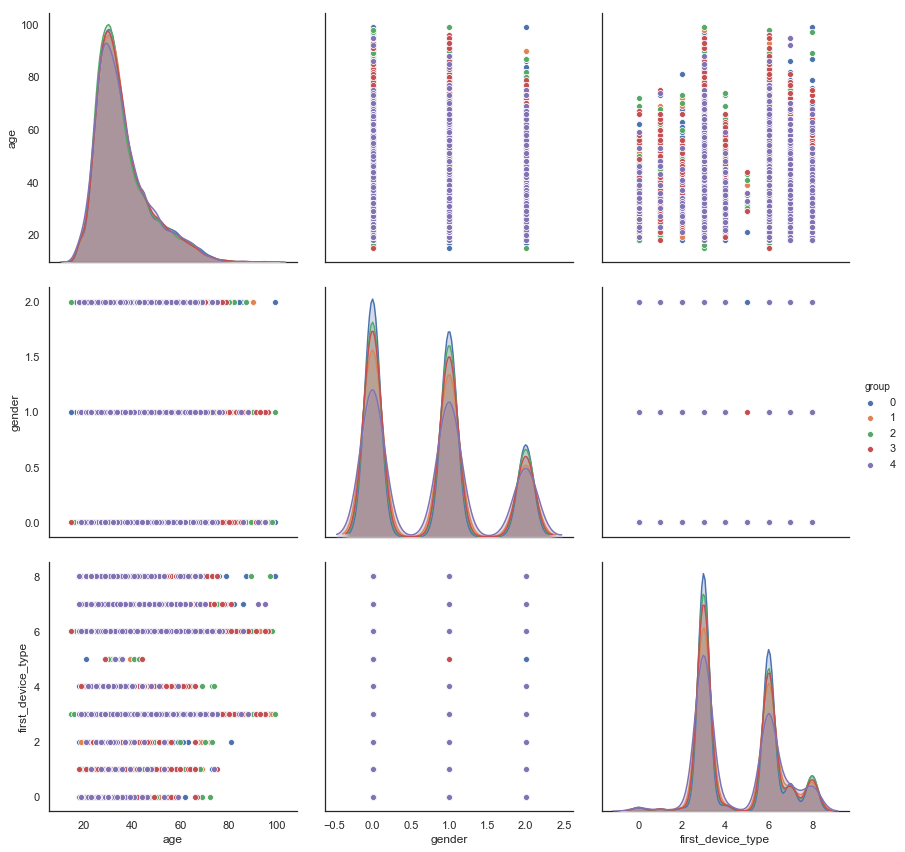

In [82]:
sns.pairplot(clustered.dropna(), hue='group',size=4,vars=["age","gender","first_device_type"],kind='scatter')

In [83]:
nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in nc]
kmeans

[KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='

In [84]:
score = [kmeans[i].fit(users_to_cluster).score(users_to_cluster) for i in range(len(kmeans))]
score

[-16933820.833872993,
 -5811337.28113196,
 -3319101.4599576304,
 -2242105.9429217163,
 -1730134.1122859344,
 -1412453.9134636337,
 -1198546.926405149,
 -1039611.8850927583,
 -932157.0650617828]

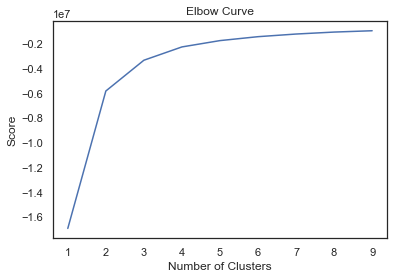

In [85]:
plt.plot(nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()